In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df=pd.read_csv("/content/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [151]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


Text(0.5, 1.0, 'Performance Index vs Hours Studied')

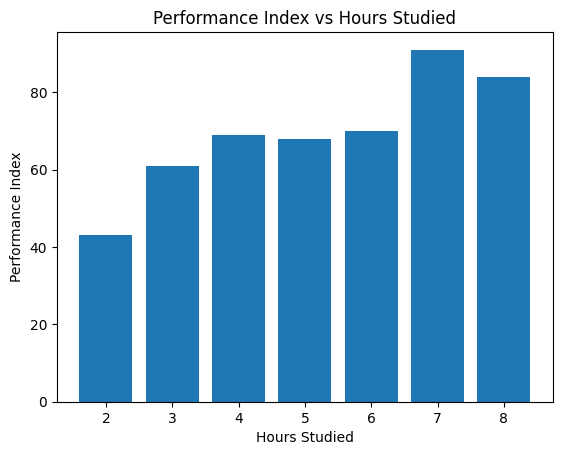

In [152]:
plt.bar(df['Hours Studied'].head(20),df['Performance Index'].head(20))
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Performance Index vs Hours Studied")

In [153]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [154]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Extracurricular Activities']=encoder.fit_transform(df['Extracurricular Activities'])
df['Extracurricular Activities'].unique()

array([1, 0])

<Axes: >

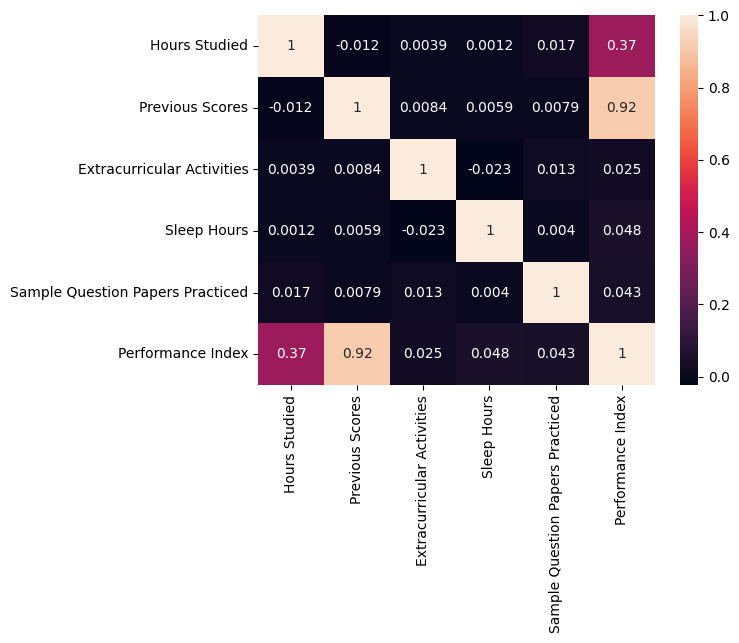

In [155]:
sns.heatmap(df.corr(),annot=True)

In [165]:
from sklearn.model_selection import train_test_split
input=df.drop(['Performance Index'],axis=1)
output=df['Performance Index']

In [189]:
x_train,x_test,y_train,y_test=train_test_split(input,output,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 5)
(3000, 5)
(7000,)
(3000,)


In [190]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [191]:
user_ip=[7,99,1,9,1]
Prediction=model.predict([user_ip])
print("The Student Performace Index:",Prediction)

The Student Performace Index: [89.62]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [202]:
from sklearn.metrics import accuracy_score,root_mean_squared_error,roc_auc_score,r2_score
y_pred=model.predict(x_test)
print(f"RMSE:{root_mean_squared_error(y_test,y_pred)}")
print(f"R2 Score:{r2_score(y_test,y_pred)}")

RMSE:2.291745029508662
R2 Score:0.9858074387324872
